# Sympy experiments


# Sympy playground

In [12]:
import sympy
sympy.init_printing()
from IPython.display import display, Markdown


## Biquad transformation 

In [ ]:
s, m,c,d,n,a,b,z,y, T = sympy.symbols("s m c d n a b z y T")

Biquad transfer function

In [ ]:
Hn = m*s**2 + c*s + d
Hd = n*s**2 + a*s + b
H = Hn / Hd
H

Substitute 
$s\rightarrow \frac{2}{T}\cdot\frac{z-1}{z+1}$

In [ ]:
H.subs(s,(2/T)*(z-1)/(z+1))

In [ ]:
sympy.collect(sympy.simplify(sympy.collect(sympy.expand(H.subs(s,(2/T)*(z-1)/(z+1))),z)),z)

rewrite in terms of $z^{-1}$ delay notation and refactoring the time to get it to the format used in SimulC:

$$\frac{
\left( d - 2 c/T + 4 m/T^{2}\right)z^{-2} + 
 \left(2 d - 8 m/ T^{2}\right)z^{-1} + 
\left( d + 2  c/T + 4 m/T^{2}\right) 
}{
\left( b - 2 a/T + 4 n/T^{2}\right)z^{-2} + 
 \left(2  b - 8 n/T^{2}\right)z^{-1} +
\left( b + 2 a/T + 4 n/T^{2}\right) 
}
$$

## FEM solution

In [5]:
a, b, x, y, x1, x2, x3, x4, y1, y2, y3, y4 = sympy.symbols("a, b, x, y, x_1 x_2 x_3 x_4 y_1 y_2 y_3 y_4")

In [ ]:
# sympy.solve((1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 -x,a)



In [ ]:
# sympy.solve((1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 -x,b)


In [ ]:
# sympy.solve((1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 -y,a)

In [ ]:
# sympy.solve((1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 -y,b)

Solve the set of both equations for a and b


In [16]:
sols = sympy.solve ([
    (1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 - x , 
    (1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 - y
    ] , 
    [a, b]
    )


AttributeError: module 'sympy.solvers.solvers' has no attribute 'solveset'

In [30]:
print(len(sols), len(sols[0]), len(sols[1]))


2 2 2


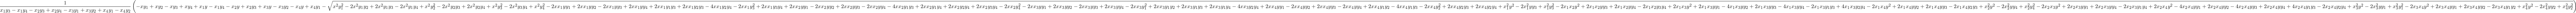

In [43]:
sympy.simplify(sols[0][0])

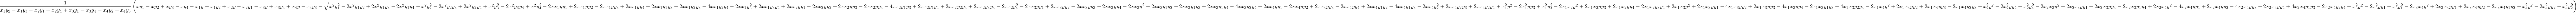

In [46]:
sympy.simplify(sols[0][1])

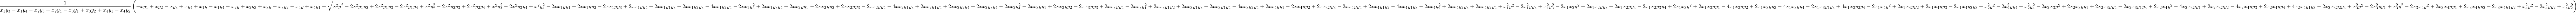

In [47]:
sympy.simplify(sols[1][0])

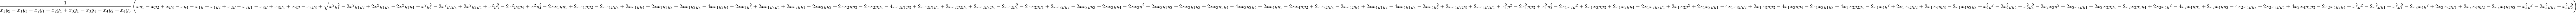

In [48]:
sympy.simplify(sols[1][1])

In [40]:
print(sympy.latex(sols[1][0]))

\frac{1}{x_{1} y_{3} - x_{1} y_{4} - x_{2} y_{3} + x_{2} y_{4} - x_{3} y_{1} + x_{3} y_{2} + x_{4} y_{1} - x_{4} y_{2}} \left(- x y_{1} + x y_{2} - x y_{3} + x y_{4} + x_{1} y - x_{1} y_{4} - x_{2} y + x_{2} y_{3} + x_{3} y - x_{3} y_{2} - x_{4} y + x_{4} y_{1} + \sqrt{x^{2} y_{1}^{2} - 2 x^{2} y_{1} y_{2} + 2 x^{2} y_{1} y_{3} - 2 x^{2} y_{1} y_{4} + x^{2} y_{2}^{2} - 2 x^{2} y_{2} y_{3} + 2 x^{2} y_{2} y_{4} + x^{2} y_{3}^{2} - 2 x^{2} y_{3} y_{4} + x^{2} y_{4}^{2} - 2 x x_{1} y y_{1} + 2 x x_{1} y y_{2} - 2 x x_{1} y y_{3} + 2 x x_{1} y y_{4} + 2 x x_{1} y_{1} y_{3} + 2 x x_{1} y_{2} y_{3} - 4 x x_{1} y_{2} y_{4} - 2 x x_{1} y_{3}^{2} + 2 x x_{1} y_{3} y_{4} + 2 x x_{2} y y_{1} - 2 x x_{2} y y_{2} + 2 x x_{2} y y_{3} - 2 x x_{2} y y_{4} - 4 x x_{2} y_{1} y_{3} + 2 x x_{2} y_{1} y_{4} + 2 x x_{2} y_{2} y_{4} + 2 x x_{2} y_{3} y_{4} - 2 x x_{2} y_{4}^{2} - 2 x x_{3} y y_{1} + 2 x x_{3} y y_{2} - 2 x x_{3} y y_{3} + 2 x x_{3} y y_{4} - 2 x x_{3} y_{1}^{2} + 2 x x_{3} y_{1} y_{2} + 2 x 